In [1]:
# Init
import os
import glob
import sys
import pickle

module_path = os.path.abspath(os.path.join("../src/simulicronalpha/"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports
import numpy as np
import pandas as pd
import warnings
import multiprocessing
np.set_printoptions(suppress=True)
from numpy import concatenate as c
from numpy import cumsum
import random

# Plotting imports
import altair as alt
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Acc. functions
def returnLast(lst):
    return lst[-1]

In [3]:
# Path to results
resultDir = "/home/siddharth/Documents/Projects/Simulicron/Project_1C/etaVssel/"

# Add them to a list
resultList = []
for filename in glob.glob(os.path.join(resultDir, '*.pickle')):
    with open(filename, 'rb') as f:
        resultList.append(pickle.load(f))

# Store results in a dataframe
resultDataframe = pd.DataFrame(resultList)

In [4]:
# Create a copy for inplace handling
resultDataframeC = resultDataframe.copy()

In [5]:
# Perform some data wrangling
resultDataframeC[['TranspositionRate_1','TranspositionRate_2']] = pd.DataFrame(resultDataframeC.TRate.tolist(), index= resultDataframeC.index)
resultDataframeC[['TE_1_CN','TE_2_CN']] = resultDataframeC['TEfamilyCN'].apply(pd.Series)
resultDataframeC[['TE_1_RG','TE_2_RG']] = resultDataframeC['TEfamilyRg'].apply(pd.Series)

# Add column for the last acn (average copy number) for each transposon family
resultDataframeC['TE_1_ACN'] = resultDataframeC['TE_1_CN'].apply(lambda x: returnLast(x))
resultDataframeC['TE_2_ACN'] = resultDataframeC['TE_2_CN'].apply(lambda x: returnLast(x))

# Some wrangling for plotly go
x = resultDataframeC['ETA']
y = resultDataframeC['selPen']
TE1ACN = resultDataframeC['TE_1_ACN']
TE2ACN = resultDataframeC['TE_2_ACN']

# Convert count to log scale
resultDataframeC['TE_1_ACN_l'] = np.log(resultDataframeC['TE_1_ACN'])
resultDataframeC['TE_2_ACN_l'] = np.log(resultDataframeC['TE_2_ACN'])

/home/siddharth/miniforge3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
resultDataframeC

,State,Generatrion,NTE,AvgCopyNum,CopyNumVar,TEfamilyCN,TEfamilyVR,TEfamilyRg,AvgFit,HGTGen,...,Tau,selPen,TranspositionRate_1,TranspositionRate_2,TE_1_CN,TE_2_CN,TE_1_RG,TE_2_RG,TE_1_ACN,TE_2_ACN
0,FLUX,10001,5807694,"[1.0, 1.938, 3.39, 5.41, 7.806, 10.263, 13.412...","[1.032, 4.080156, 11.363899999999997, 20.9739,...","{1: (1.0, 1.938, 3.39, 5.41, 7.806, 10.263, 13...","{1: ([1.032], [4.080156], [11.363899999999997]...","{1: (0.0, 0.022, 0.069, 0.12, 0.213, 0.321, 0....","[0.8991609043315703, 0.8355605716950608, 0.753...",50,...,1.0,-0.058263,1.0,1.0,"(1.0, 1.938, 3.39, 5.41, 7.806, 10.263, 13.412...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.022, 0.069, 0.12, 0.213, 0.321, 0.435,...","(0.0, 0.007796414735086621, 0.0244523916691353...",4.310,4.446
1,FLUX,10001,8302047,"[1.0, 1.826, 2.939, 4.179, 5.63, 6.846, 8.462,...","[1.128, 3.853724, 8.499278999999998, 15.616959...","{1: (1.0, 1.826, 2.939, 4.179, 5.63, 6.846, 8....","{1: ([1.128], [3.853724], [8.499278999999998],...","{1: (0.0, 0.028, 0.051, 0.073, 0.124, 0.177, 0...","[0.8619944438728973, 0.7934705295566513, 0.727...",50,...,1.0,-0.089252,1.0,1.0,"(1.0, 1.826, 2.939, 4.179, 5.63, 6.846, 8.462,...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.028, 0.051, 0.073, 0.124, 0.177, 0.288...","(0.0, 0.012805036882359242, 0.0233234600357257...",2.585,4.537
2,FLUX,10001,4772202,"[1.0, 1.9, 3.138, 4.824, 6.426, 7.618, 8.661, ...","[0.924, 3.238, 8.720956, 17.893024, 30.254524,...","{1: (1.0, 1.9, 3.138, 4.824, 6.426, 7.618, 8.6...","{1: ([0.924], [3.238], [8.720956], [17.893024]...","{1: (0.0, 0.013, 0.044, 0.098, 0.161, 0.232, 0...","[0.8427537107607845, 0.7641266087420159, 0.672...",50,...,1.0,-0.097810,1.0,1.0,"(1.0, 1.9, 3.138, 4.824, 6.426, 7.618, 8.661, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.013, 0.044, 0.098, 0.161, 0.232, 0.313...","(0.0, 0.011633596602323429, 0.0393752500386331...",0.000,3.525
3,FLUX,10001,3110371,"[1.0, 1.858, 3.474, 5.873, 9.626, 14.635, 20.0...","[0.944, 3.8798359999999996, 10.137324000000001...","{1: (1.0, 1.858, 3.474, 5.873, 9.626, 14.635, ...","{1: ([0.944], [3.8798359999999996], [10.137324...","{1: (0.0, 0.027, 0.078, 0.141, 0.298, 0.421, 0...","[0.9540307957563008, 0.9166219863245628, 0.864...",50,...,1.0,-0.026023,1.0,1.0,"(1.0, 1.858, 3.474, 5.873, 9.626, 14.635, 20.0...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.027, 0.078, 0.141, 0.298, 0.421, 0.575...","(0.0, 0.004844595855255258, 0.0139954991374041...",4.411,4.965
4,FLUX,10001,2181526,"[1.0, 1.926, 3.644, 6.469, 10.861, 17.572, 26....","[0.95, 3.8305240000000005, 11.131264, 23.72103...","{1: (1.0, 1.926, 3.644, 6.469, 10.861, 17.572,...","{1: ([0.95], [3.8305240000000005], [11.131264]...","{1: (0.0, 0.032, 0.092, 0.173, 0.308, 0.442, 0...","[0.9880378740311218, 0.9775623235267757, 0.960...",50,...,1.0,-0.006287,1.0,1.0,"(1.0, 1.926, 3.644, 6.469, 10.861, 17.572, 26....","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.032, 0.092, 0.173, 0.308, 0.442, 0.611...","(0.0, 0.0036647940408772693, 0.010536282867522...",2.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,FLUX,10001,2257399,"[1.0, 1.996, 3.474, 5.926, 9.639, 13.642, 17.1...","[1.036, 3.943983999999999, 9.761324, 21.710523...","{1: (1.0, 1.996, 3.474, 5.926, 9.639, 13.642, ...","{1: ([1.036], [3.943983999999999], [9.761324],...","{1: (0.0, 0.03, 0.075, 0.139, 0.242, 0.401, 0....","[0.92017378125872, 0.8673635395228141, 0.78774...",50,...,1.0,-0.043498,1.0,1.0,"(1.0, 1.996, 3.474, 5.926, 9.639, 13.642, 17.1...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.03, 0.075, 0.139, 0.242, 0.401, 0.536,...","(0.0, 0.02811919232375643, 0.07029798080939113...",0.000,4.504
496,FLUX,10001,7838133,"[1.0, 1.856, 3.069, 4.631, 6.502, 8.303, 9.798...","[0.984, 3.827264, 9.366239, 18.322839, 31.4319...","{1: (1.0, 1.856, 3.069, 4.631, 6.502, 8.303, 9...","{1: ([0.984], [3.827264], [9.366239], [18

In [56]:
# Create a scatter plot - first create a longform dataset
TL = ['TE1'] * len(resultDataframeC['TE_1_ACN_l']) + ['TE2'] * len(resultDataframeC['TE_2_ACN_l'])
ACN_l = resultDataframeC['TE_1_ACN_l'].tolist() + resultDataframeC['TE_2_ACN_l'].tolist()
ETA = resultDataframeC['ETA'].tolist() + resultDataframeC['ETA'].tolist()
markerSym = ['circle'] * len(resultDataframeC['TE_1_ACN_l']) + ['cross'] * len(resultDataframeC['TE_2_ACN_l'])
Selection_pen = resultDataframeC['selPen'].tolist() + resultDataframeC['selPen'].tolist()
# Creating the dataframe
ScatterFrame = pd.DataFrame({'TransposonType':TL,'ACN_log':ACN_l, 'ETA': ETA, 'Selection_pen': Selection_pen, 'markerSym': markerSym}) 
# Creating scatter plots
fig = px.scatter(ScatterFrame, x="Selection_pen", y="ETA", color="ACN_log", symbol='markerSym', width=800, height=800, opacity=0.5)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=-0.2,
                                          ticks="inside",))

# For each subtype
fig1 = px.scatter(resultDataframeC, x='selPen', y='ETA', color='TE_1_ACN_l', width=800, height=800,)
fig2 = px.scatter(resultDataframeC, x='selPen', y='ETA', color='TE_2_ACN_l', width=800, height=800,)

# Facet
fig3 = px.scatter(ScatterFrame, x='Selection_pen', y='ETA', color='ACN_log', facet_col='TransposonType', width=800, height=800,)

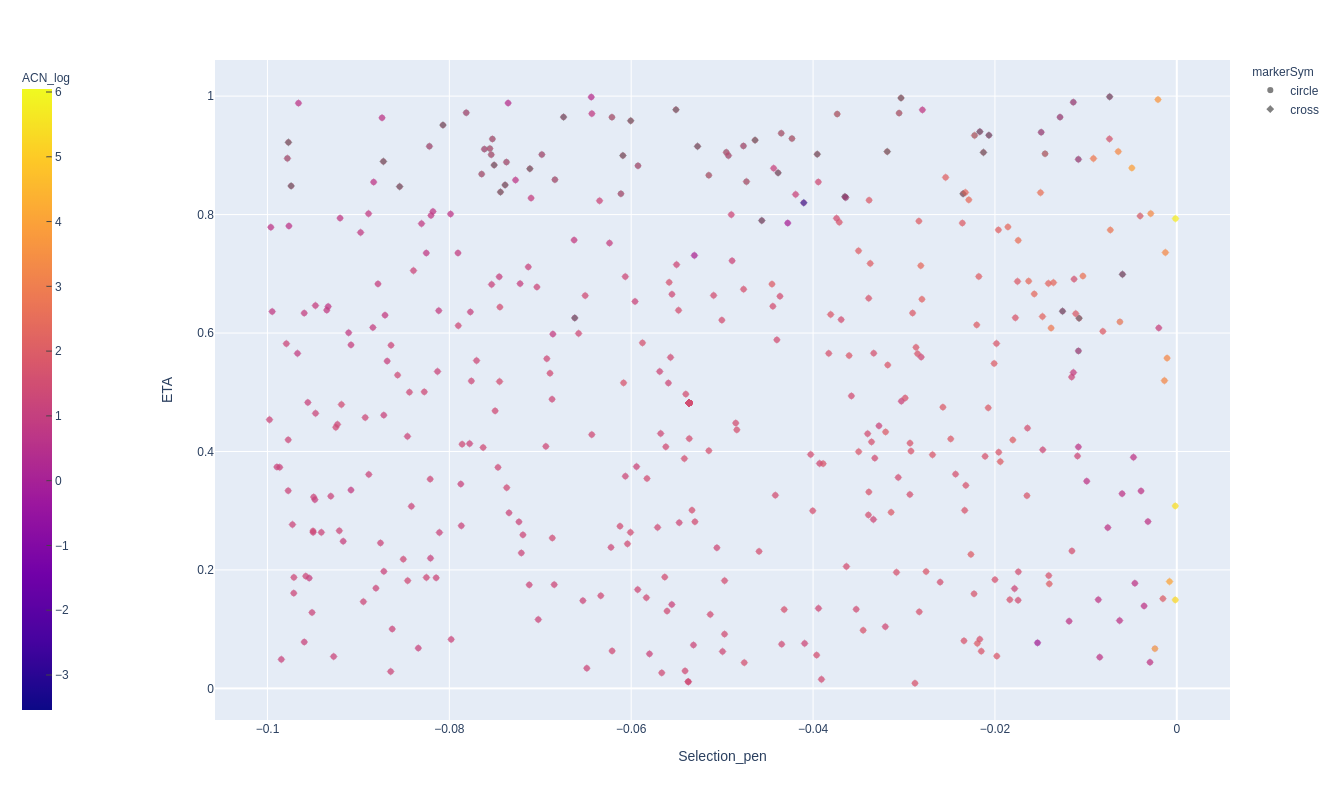

In [54]:
fig

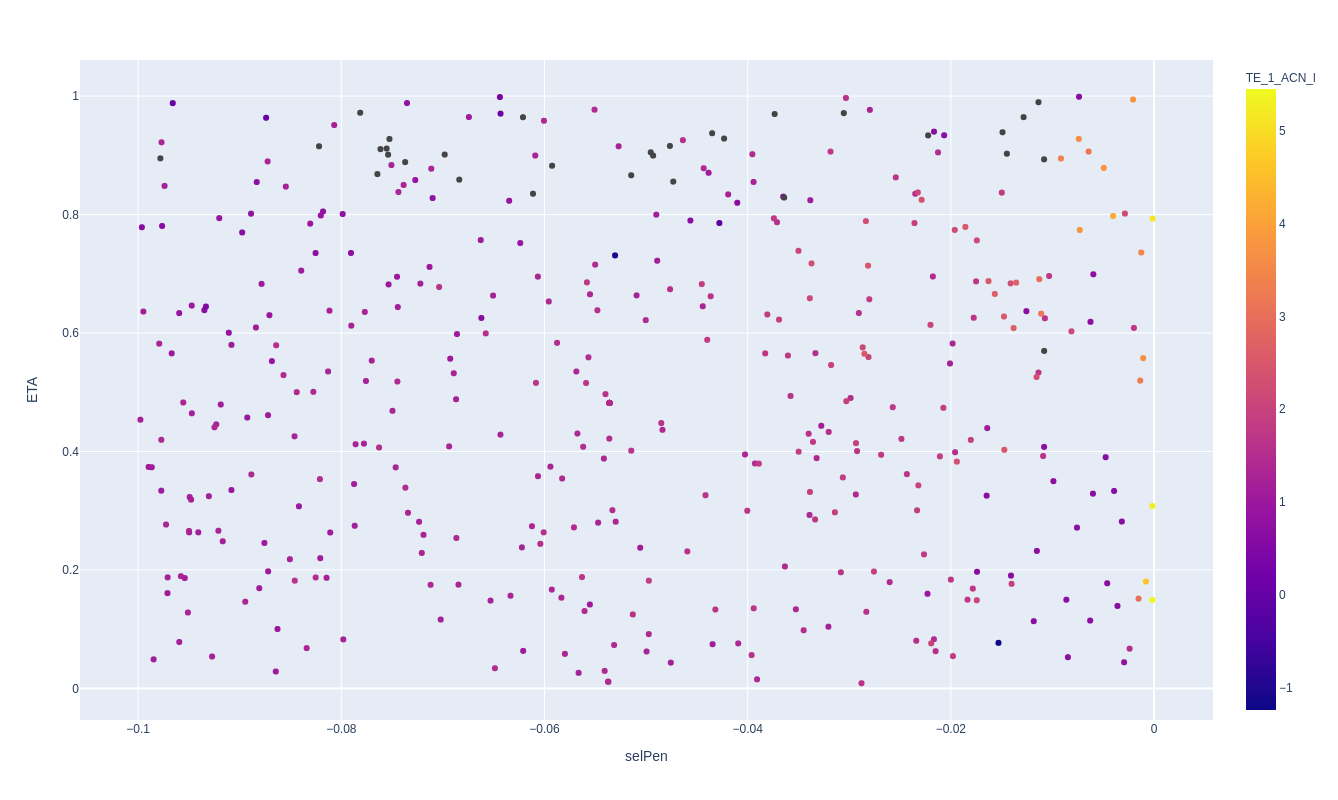

In [9]:
fig1

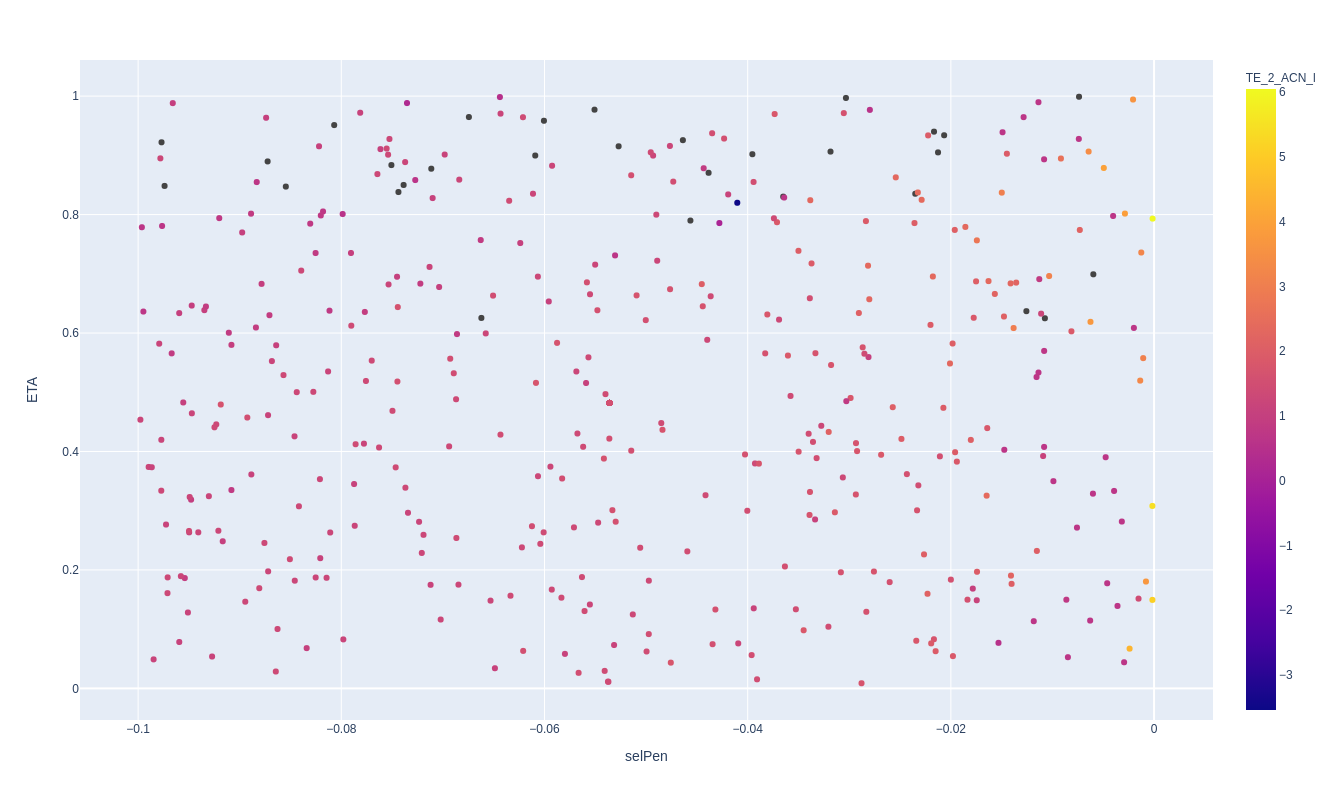

In [10]:
fig2

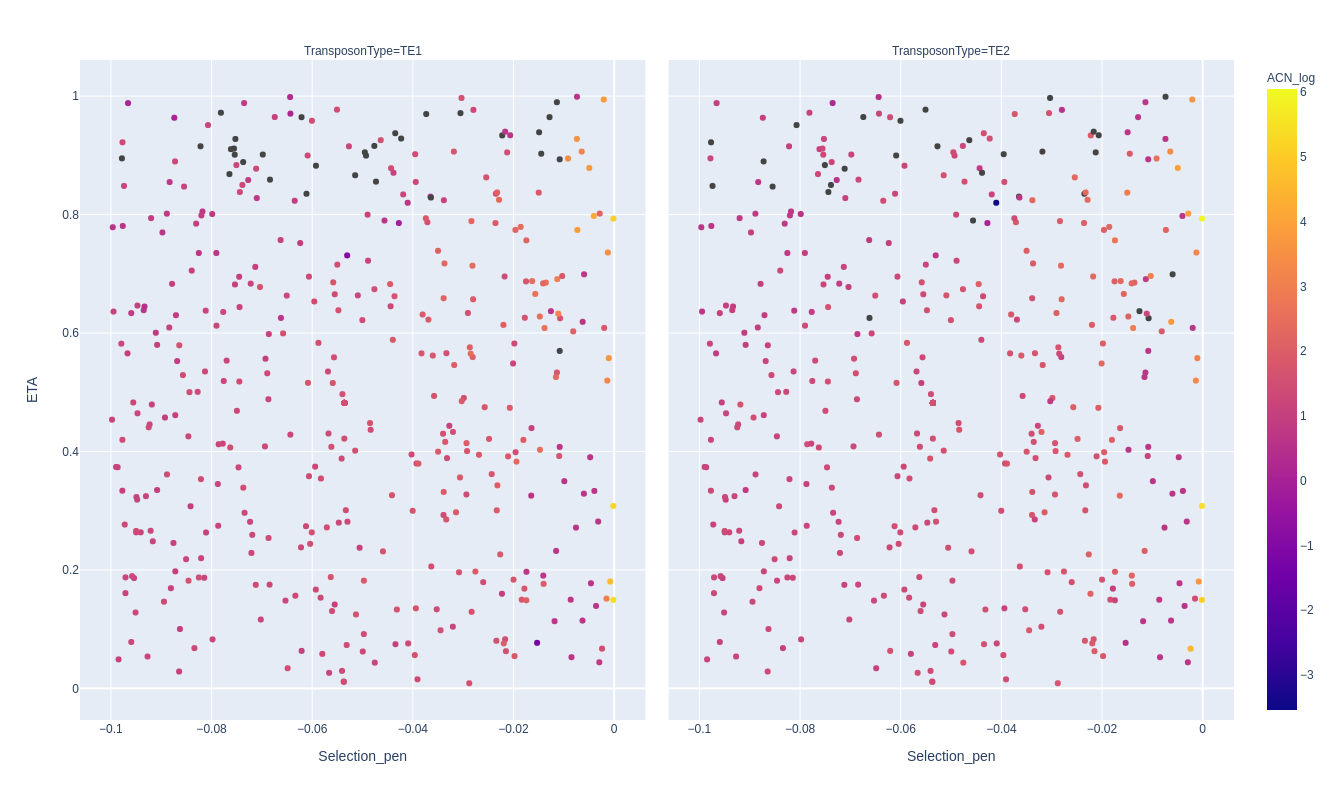

In [57]:
fig3

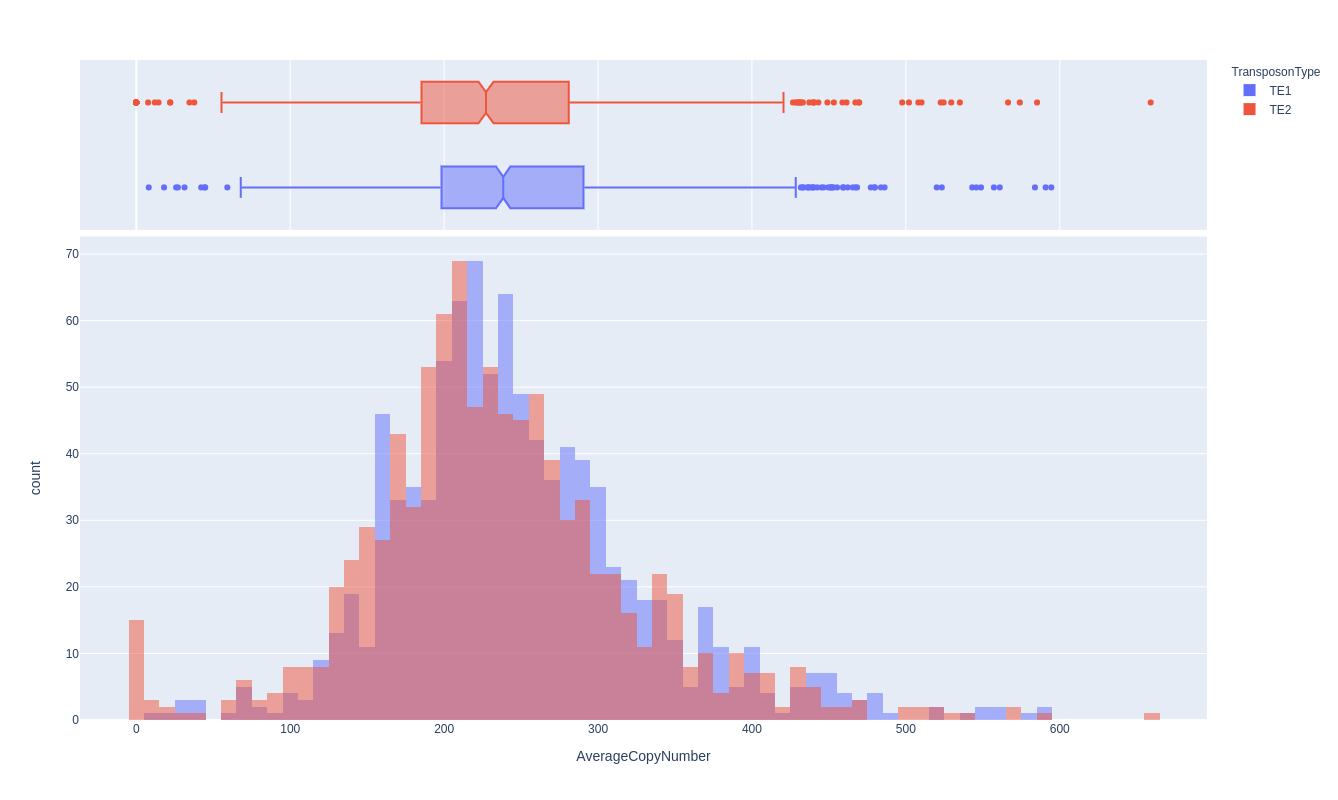

In [30]:
# Plot the histogram
# Some dummy arrays and dataframe
TL = ['TE1'] * len(TE1ACN) + ['TE2'] * len(TE2ACN)
ACN = TE1ACN.tolist() + TE2ACN.tolist()
histoFrame = pd.DataFrame({'TransposonType':TL,'AverageCopyNumber':ACN}) 
fig3 = px.histogram(histoFrame, x="AverageCopyNumber", color="TransposonType",  width=800, height=800, marginal="box", barmode='overlay')
fig3

In [102]:
import plotly.graph_objs as go
import pandas as pd
from plotly import tools

trace1 = dict(type='scatter3d', scene='scene1', x=x, y=y, z=z, mode='markers', marker=dict(size=5,color=TE1ACN,colorscale='Viridis',opacity=0.8))

trace2 = dict(type='scatter3d', scene='scene2', x=x, y=y, z=z, mode='markers', marker=dict(size=5,color=TE2ACN,colorscale='Viridis',opacity=0.8))

f= tools.make_subplots(rows=1, cols=2, specs=[[{'is_3d': True}, {'is_3d': True}]])

f.append_trace(trace1, 1, 1)
f.append_trace(trace2, 1, 2)

fig = go.FigureWidget(f)

def cam_change(layout, camera):
    fig.layout.scene2.camera = camera

fig.layout.scene1.on_change(cam_change, 'camera')
fig.layout.margin.b = 0
fig.layout.margin.l = 0
fig.layout.margin.r = 0
fig.layout.margin.t = 0
fig.layout.margin.pad = 0
fig.update_layout(height=500, width=500, showlegend=False,)
fig

FigureWidget({
    'data': [{'marker': {'color': array([283.99 , 230.457, 208.963, ..., 590.833, 194.284, 271.…